<strong><h1> Notebook réponse temporelle</h1></Strong>
<br><font size =4 font="Verdana">
<p>Cette seconde partie du tutorial est une aide afin de mieux comprendre les concepts mis en jeu lors des différents travaux que vous devrez faire tout au long des séances. <br>
Il permet donc de mieux assimiler les différents concepts.
Contrairement à la première partie n'utilisez cette partie que lorsque vous aurez  bien maîtrisé le 1er notebook avec un travail en amont. 
</p>


<strong><h2>&Eacute;tape 1: import</h2></strong>
<font size =4 font="Verdana">Cet enchainement de commande sert à importer les package nécessaires. Le <strong>as</strong> permet de renommer le package. Le <strong>from...import</strong> permet de n'importer que le sous package nécessaire

In [2]:
from scipy import signal    #importe signal                                                           
import numpy as np
import matplotlib.pyplot as plt #pour les graphiques

<strong><h2>&Eacute;tape 2: d&eacute;claration du signal d'entr&eacute;e</h2></strong>
<font size =4 font="Verdana">On définit la pulsation du sinus et son amplitude, ici 2*sin(3t)

In [3]:
#pulsation_sin=float(input("Entrez la pulsation w du sinus d'entrée : ")) #pour un usage interactif
pulsation_sin=3
amp_sin=2

#La période du sinus
periode_sin=2*np.pi/pulsation_sin 
dt=periode_sin/10000 #notre dt

<strong><h2>&Eacute;tape 3: Fonction de transfert</h2></strong>
<font size =4 font="Verdana">On définit la fonction de transfert comme vu dans le notebook 1

In [4]:
sys = signal.TransferFunction([0.7025], [1.4, 1])

<strong><h2>&Eacute;tape 4: Simulation de la sortie</h2></strong>

In [5]:
#On crée un tableau de valeur d'intervalle temps dt sur une période du sinus
t = np.arange(0, periode_sin, dt)
#notre signal d'entrée
u = amp_sin*np.sin(pulsation_sin*t) 
#on simule
t_out, u_out, x = signal.lsim2(sys, u, t) 


<strong><h2>Etape 3 : Calculs "manuels" de la pulsation, du gain et du déphasage</h2></strong>

Pour un sinus de pulsation w= 3
La déphasage en degrès vaut : -26.568


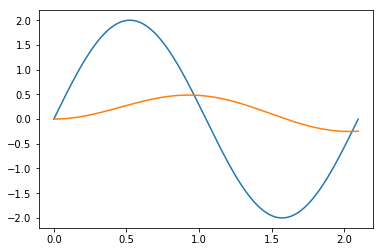

In [8]:
# affiche la pulsation 
print("Pour un sinus de pulsation w=",pulsation_sin)

# calcul du gain 
# c'est le quotient entre le maximum du signal de sortie et le maximum du signal d'entrée
gain =max(u_out)/max(u)   

# déphasage 
# Ici, on va utiliser une formule pour déterminer le déphasasage, qui est la suivante : φ = ΔT/2π*360 ou φ=ΔT*w au choix
# ΔT = le retard , ω = pulsation 

#calcul de ΔT
#on récupère l'indice du tableau correspondant à la valeur minimum de la sortie
indice_min_sortie=np.argmin(u_out) 
#idem pour l'entrée
indice_min_entree=np.argmin(u)
#on obtient ΔT
retard=(indice_min_sortie-indice_min_entree)*dt

phase= retard/(2*np.pi)*360
print("La déphasage en degrès vaut :",-phase)
    

plt.plot(t_out,u,label="signal entrée")
plt.plot(t_out, u_out,label="signal de sortie")
plt.show()


    

<font size =4 font="Verdana">
<h2>Exemple : </h2>

<font size =4 font="Verdana"> Réponse temporelle de  <br><br> G(s) = 1 / (s+1) </font>

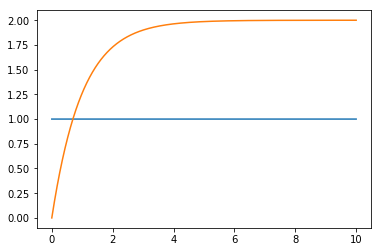

Le gain est : 1.99990918236


In [9]:
from scipy import signal    #importe signal                                                           
import numpy as np
import matplotlib.pyplot as plt #pour les graphiques

dt=1/10000 
#diminuer le dt pour améliorer la précision

#fonction de transfert du système
sys = signal.TransferFunction([2], [1, 1])


#On crée un tableau de valeur d'intervalle temps dt sur une période du sinus
#plus on augmente le deuxième le deuxième paramètre plus on calcule de valeurs
t = np.arange(0.000000001, 10, dt)
#notre signal d'entrée
u = 1*t/t #si E =1 pour avoir un tableau de valeur de même taille que t
#on simule
t_out, u_out, x = signal.lsim2(sys, u, t) 

plt.plot(t_out,u,label="signal entrée")
plt.plot(t_out, u_out,label="signal de sortie")
plt.show()

gain =max(u_out)/max(u)   
print("Le gain est :", gain)